In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
df=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Downloads\StrideOne\heart (1).csv',encoding= 'unicode_escape')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.size

11016

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [9]:
df.columns.values

array(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'], dtype=object)

--EDA

 Analysis on numerical data

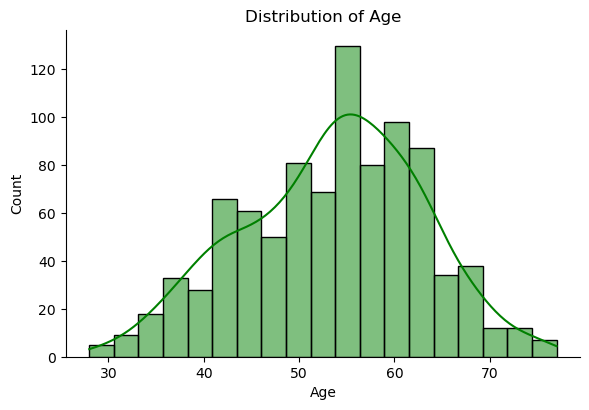

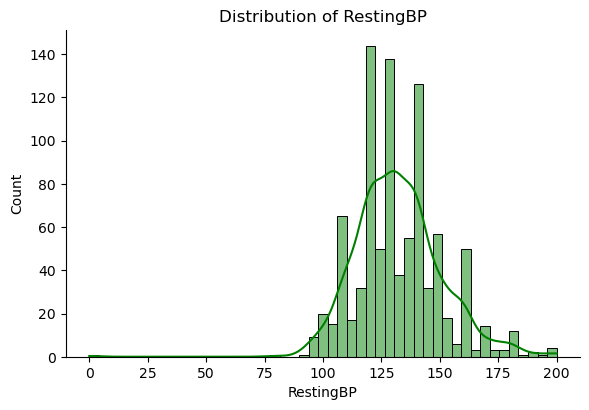

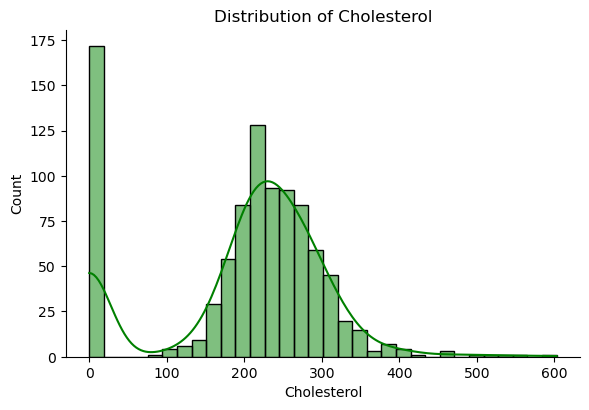

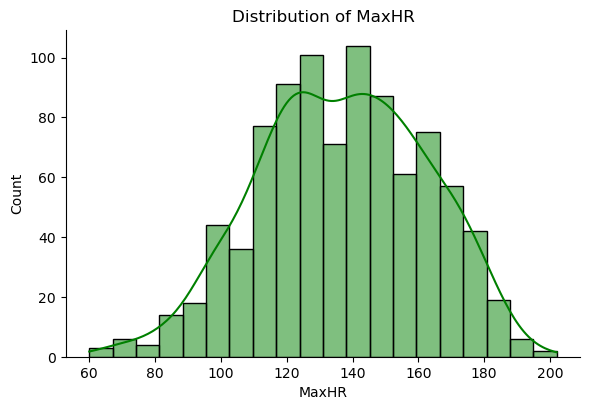

In [10]:
columns = ['Age','RestingBP','Cholesterol','MaxHR']
for column in columns:
    sns.displot(df[column], kde=True, color='green', height=4, aspect=1.5)
    #sns.boxplot(df[column],color='green')
    plt.title(f'Distribution of {column}')
    plt.show()

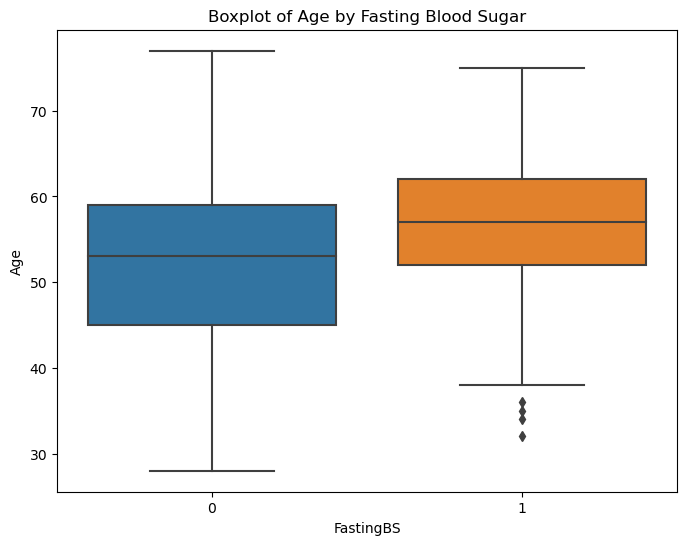

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='FastingBS', y='Age', data=df)  
plt.title('Boxplot of Age by Fasting Blood Sugar')
plt.show()


Analysis on categorical  data



Text(0.5, 1.0, 'Sex Distribution')

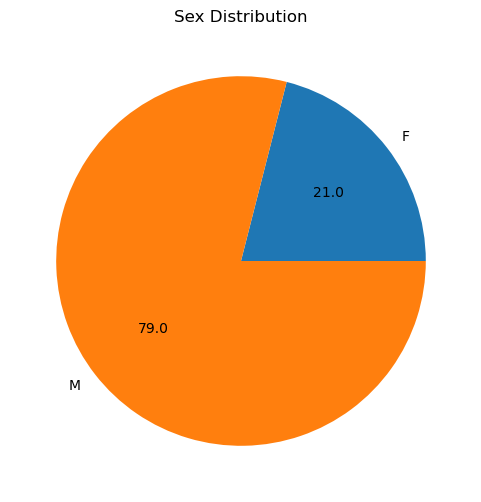

In [20]:
# Sex Distribution
df.groupby('Sex').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))
plt.title('Sex Distribution')


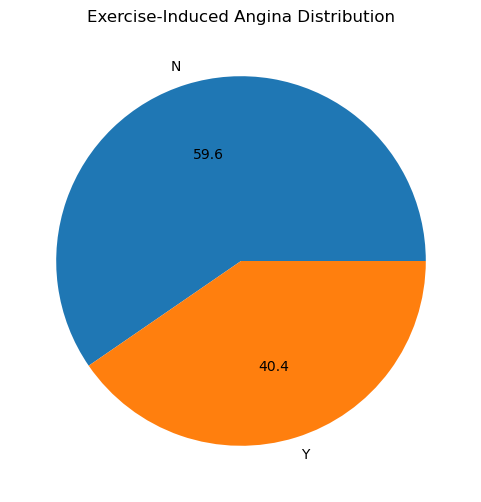

In [13]:
# Sex Distribution
df.groupby('ExerciseAngina').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))
plt.title('Exercise-Induced Angina Distribution')
plt.show()

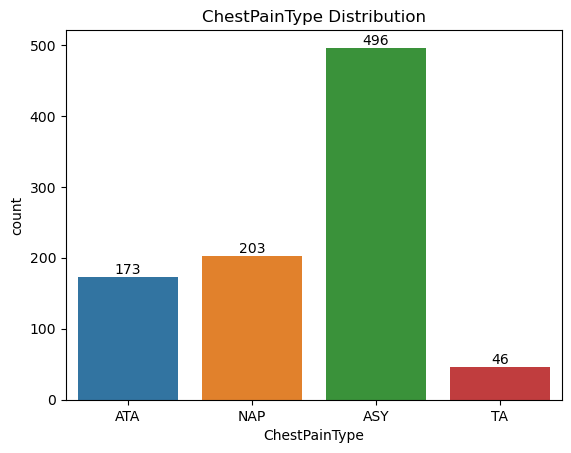

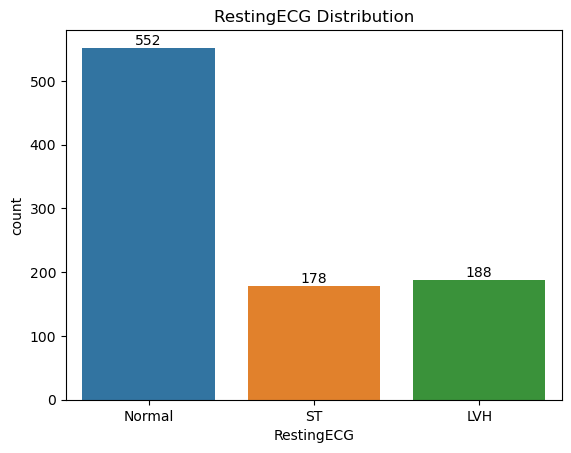

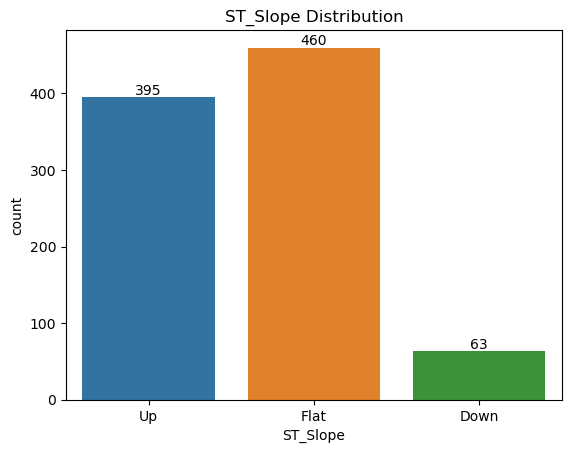

In [14]:
columns = ['ChestPainType', 'RestingECG', 'ST_Slope']
for column in columns:
    ax = sns.countplot(x=column, data=df)
    plt.title(f'{column} Distribution')
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.show()

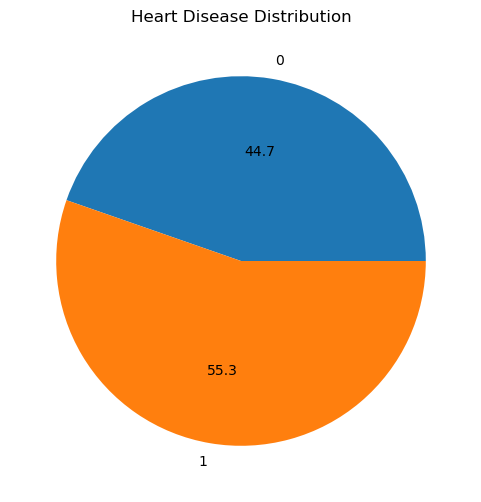

In [15]:
# Heart Disease
df.groupby('HeartDisease').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))
plt.title('Heart Disease Distribution')
plt.show()

In [16]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


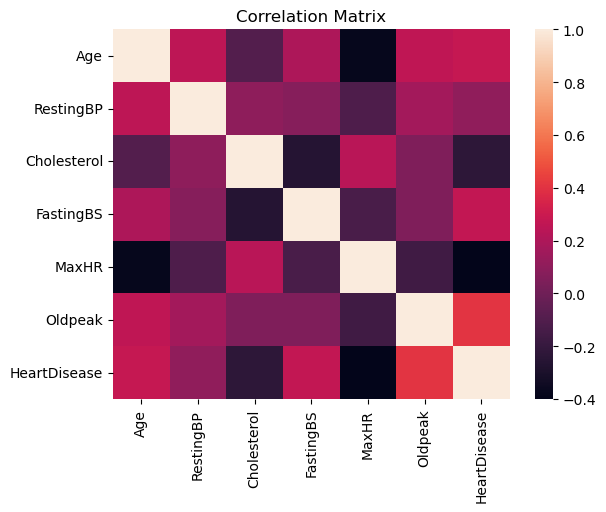

In [17]:
sns.heatmap(df.corr(numeric_only=True))
plt.title('Correlation Matrix')
plt.show()